# Assignment 2: Encampment Service Request Frequency in LA County Census Tracts
**Grouping LA 311 Encampment Service Requests by Census Tracts creates the opportunity to compare service request frequency with area factors including race, median income, and rent burden to examine correlation.** Note: My partner dropped this week and I spent a significant amount of time figuring out other data analysis methods on my encampment and parks geographies, like buffers, so for this assignment I stuck to the minimum amount of work. I also included my notebook for park geometry with buffers in this folder as it shows where I concentrated my effort, and I look forward to brining the explorations in these two notebooks together for a much richer analysis!

1.   Create a Jupyter Notebook and use pandas to explore and visualize the data
2.   Produce several charts, including one or more maps
3.   Make sure to document each procedure with markdown cells with relevant headers
4.   Run the cells in the notebook, and make sure the notebook "reads" from top to bottom, telling a story
5.   At the end of the notebook, include a markdown cell that identifies each member of the group and describes their contribution to this assignment (one sentence each)
6.   Upload the Jupyter Notebook to your group repo

## Begin by importing the necessary module and data

In [1]:
#import module pandas
import pandas as pd

In [2]:
#import relevant census data
#Remember to specify necessary geo codes as strings
tracts = pd.read_csv(
    'data/ACS-Data_Pop-Density_Race_Med-Income_Rent-Burden.csv',
    dtype={
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    })

In [3]:
#Even with importing as strings leading 0s were missing
#So resore them
tracts['Geo_FIPS']=tracts['Geo_FIPS'].str.zfill(11)
tracts['Geo_STATE']=tracts['Geo_STATE'].str.zfill(2)
tracts['Geo_COUNTY']=tracts['Geo_COUNTY'].str.zfill(3)
tracts.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,PCT_SE_A03001_005,PCT_SE_A03001_006,PCT_SE_A03001_007,PCT_SE_A03001_008,SE_A14006_001,SE_B18002_001,SE_B18002_002,SE_B18002_003,PCT_SE_B18002_002,PCT_SE_B18002_003
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3870,NaN,...,7.63,0.09,11.57,2.71,53077.0,829,225,279,27.14,33.66
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,NaN,...,6.36,0.00,1.88,1.88,88953.0,230,106,53,46.09,23.04
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,NaN,...,4.30,0.00,12.16,1.87,32119.0,1984,482,866,24.29,43.65
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,NaN,...,8.64,0.00,13.93,4.09,41728.0,823,231,382,28.07,46.42
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3874,NaN,...,6.73,0.00,1.12,2.19,86914.0,167,19,72,11.38,43.11


In [4]:
#I want to be able to see all columns at once
#May as well scroll through all rows too
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#learn a bit more about the data, including empty columns
tracts.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   object 
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_US             0 non-null      float64
 10  Geo_REGION         0 non-null      float64
 11  Geo_DIVISION       0 non-null      float64
 12  Geo_STATECE        0 non-null      float64
 13  Geo_STATE          2346 non-null   object 
 14  Geo_COUNTY         2346 non-null   object 
 15  Geo_COUSUB         0 non-null      float64
 16  Geo_PLACE          0 non

In [6]:
#automatically identify empty columns
#drop those empty columns
tracts.columns[tracts.isna().all()].tolist()
tracts = tracts.dropna(axis=1,how="all")
tracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           2346 non-null   object 
 1   Geo_GEOID          2346 non-null   object 
 2   Geo_NAME           2346 non-null   object 
 3   Geo_QName          2346 non-null   object 
 4   Geo_STUSAB         2346 non-null   object 
 5   Geo_SUMLEV         2346 non-null   int64  
 6   Geo_GEOCOMP        2346 non-null   int64  
 7   Geo_FILEID         2346 non-null   object 
 8   Geo_LOGRECNO       2346 non-null   int64  
 9   Geo_STATE          2346 non-null   object 
 10  Geo_COUNTY         2346 non-null   object 
 11  Geo_TRACT          2346 non-null   int64  
 12  SE_A00002_001      2346 non-null   int64  
 13  SE_A00002_002      2343 non-null   float64
 14  SE_A00002_003      2346 non-null   float64
 15  SE_A03001_001      2346 non-null   int64  
 16  SE_A03001_002      2346 

In [7]:
#drop some more columns that we don't need
columns_to_drop = ['Geo_GEOID','Geo_STUSAB','Geo_SUMLEV','Geo_GEOCOMP','Geo_FILEID','Geo_LOGRECNO','SE_A03001_001']
tracts = tracts.drop(columns_to_drop,axis=1)

In [8]:
#rename the rest - start by listing them
columns = list(tracts)
columns

['Geo_FIPS',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'SE_A00002_001',
 'SE_A00002_002',
 'SE_A00002_003',
 'SE_A03001_002',
 'SE_A03001_003',
 'SE_A03001_004',
 'SE_A03001_005',
 'SE_A03001_006',
 'SE_A03001_007',
 'SE_A03001_008',
 'PCT_SE_A03001_002',
 'PCT_SE_A03001_003',
 'PCT_SE_A03001_004',
 'PCT_SE_A03001_005',
 'PCT_SE_A03001_006',
 'PCT_SE_A03001_007',
 'PCT_SE_A03001_008',
 'SE_A14006_001',
 'SE_B18002_001',
 'SE_B18002_002',
 'SE_B18002_003',
 'PCT_SE_B18002_002',
 'PCT_SE_B18002_003']

In [9]:
#then copy, paste, rename
tracts.columns = ['FIPS',
 'NAME',
 'QName',
 'STATE',
 'COUNTY',
 'TRACT',
 'TotalPop',
 'PopDens',
 'Area',
 'White',
 'Black',
 'NatAm',
 'Asian',
 'Islander',
 'Other',
 'TwoMore',
 'PCT_White',
 'PCT_Black',
 'PCT_NatAm',
 'PCT_Asian',
 'PCT_Islander',
 'PCT_Other',
 'PCT_TwoMore',
 'MedIncome',
 'RentOccUnits',
 '30to49PCT',
 '50PCTplus',
 'PCT_30to49PCT',
 'PCT_50PCTplus']

In [10]:
#check that it worked
tracts.head()

,FIPS,NAME,QName,STATE,COUNTY,TRACT,TotalPop,PopDens,Area,White,Black,NatAm,Asian,Islander,Other,TwoMore,PCT_White,PCT_Black,PCT_NatAm,PCT_Asian,PCT_Islander,PCT_Other,PCT_TwoMore,MedIncome,RentOccUnits,30to49PCT,50PCTplus,PCT_30to49PCT,PCT_50PCTplus
0,06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",06,037,101110,4314,9780.452,0.441084,3314,47,4,329,4,499,117,76.82,1.09,0.09,7.63,0.09,11.57,2.71,53077.0,829,225,279,27.14,33.66
1,06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",06,037,101122,3239,3172.779,1.020872,2837,61,13,206,0,61,61,87.59,1.88,0.40,6.36,0.00,1.88,1.88,88953.0,230,106,53,46.09,23.04
2,06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",06,037,101210,6052,24089.210,0.251233,4771,172,0,260,0,736,113,78.83,2.84,0.00,4.30,0.00,12.16,1.87,32119.0,1984,482,866,24.29,43.65
3,06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",06,037,101220,3497,12959.460,0.269841,2494,71,0,302,0,487,143,71.32,2.03,0.00,8.64,0.00,13.93,4.09,41728.0,823,231,382,28.07,46.42
4,06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",06,037,101300,4297,4311.606,0.996612,3705,161,0,289,0,48,94,86.22,3.75,0.00,6.73,0.00,1.12,2.19,86914.0,167,19,72,11.38,43.11


In [11]:
#to start mapping we need geopandas
import geopandas as gpd

In [12]:
#add census tract shape data
tract_shape=gpd.read_file('data/LA_tracts.geojson')
tract_shape.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,Census Tract (2012),06037101110,06037101110,06037101110-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...",/1.0/boundary/06037101110-census-tract-2012/,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,Census Tract (2012),06037101122,06037101122,06037101122-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...",/1.0/boundary/06037101122-census-tract-2012/,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,Census Tract (2012),06037101210,06037101210,06037101210-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...",/1.0/boundary/06037101210-census-tract-2012/,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,Census Tract (2012),06037101220,06037101220,06037101220-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...",/1.0/boundary/06037101220-census-tract-2012/,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,Census Tract (2012),06037101300,06037101300,06037101300-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...",/1.0/boundary/06037101300-census-tract-2012/,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [13]:
#cut down to what we need - FIPS and gemetry
tract_shape = tract_shape[['name','geometry']]
tract_shape.head()

,name,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [14]:
#rename name column so we don't get confused
tract_shape.columns = ['FIPS','geometry']
tract_shape.head()

,FIPS,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


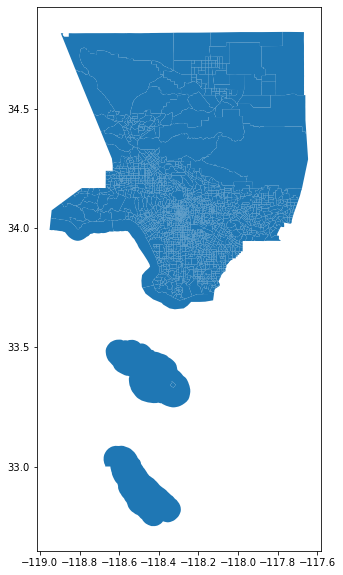

In [15]:
#plot census tracts
tract_shape.plot(figsize=(12,10))

In [16]:
#merge census data with tract shapes
tracts_info=tract_shape.merge(tracts,on="FIPS")
tracts_info.head()

,FIPS,geometry,NAME,QName,STATE,COUNTY,TRACT,TotalPop,PopDens,Area,White,Black,NatAm,Asian,Islander,Other,TwoMore,PCT_White,PCT_Black,PCT_NatAm,PCT_Asian,PCT_Islander,PCT_Other,PCT_TwoMore,MedIncome,RentOccUnits,30to49PCT,50PCTplus,PCT_30to49PCT,PCT_50PCTplus
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",06,037,101110,4314,9780.452,0.441084,3314,47,4,329,4,499,117,76.82,1.09,0.09,7.63,0.09,11.57,2.71,53077.0,829,225,279,27.14,33.66
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031...",Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",06,037,101122,3239,3172.779,1.020872,2837,61,13,206,0,61,61,87.59,1.88,0.40,6.36,0.00,1.88,1.88,88953.0,230,106,53,46.09,23.04
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859...",Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",06,037,101210,6052,24089.210,0.251233,4771,172,0,260,0,736,113,78.83,2.84,0.00,4.30,0.00,12.16,1.87,32119.0,1984,482,866,24.29,43.65
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859...",Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",06,037,101220,3497,12959.460,0.269841,2494,71,0,302,0,487,143,71.32,2.03,0.00,8.64,0.00,13.93,4.09,41728.0,823,231,382,28.07,46.42
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719...",Census Tract 1013,"Census Tract 1013, Los Angeles County, California",06,037,101300,4297,4311.606,0.996612,3705,161,0,289,0,48,94,86.22,3.75,0.00,6.73,0.00,1.12,2.19,86914.0,167,19,72,11.38,43.11


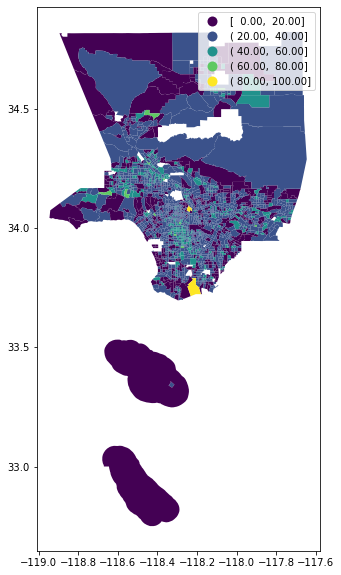

In [17]:
#plot a variable to make sure it's working
#here's tracts with severe rent burdens, aka the % of residents in each census tract paying over 50% of income towards rent
tracts_info.plot(figsize=(12,10),
                 column='PCT_50PCTplus',
                 legend=True, 
                 scheme='equal_interval')

In [18]:
#I want to see if I can combine my parks/encampment info with the census tracts
#so copying in from another file 


#parks data
parks=gpd.read_file('data/LA_Parks_Information.geojson')

#drop unnecessary columns
parks_columns_to_drop = ['name_alpha','issubpark','name_publi']
parks = parks.drop(parks_columns_to_drop,axis=1)

#rename columns
parks.columns = ['name',
 'area_sf',
 'object_id',
 'park_id',
 'shape_leng',
 'area_acres',
 'region',
 'address',
 'class',
 'cd',
 'geometry']

#convert strings to floats for later use
parks['area_acres'] = parks['area_acres'].astype(float)
parks['area_sf'] = parks['area_sf'].astype(float)

#encampment service req data
encamp_2017 = gpd.read_file('data/2017-311_Homeless_Encampment_Requests_raw.csv')

#rename columns
encamp_2017.columns = ['req_num',
 'created_date',
 'updated_date',
 'action_taken',
 'owner',
 'req_type',
 'status',
 'req_source',
 'mobile',
 'anon',
 'assign_to',
 'serve_date',
 'closed_date',
 'add_verf',
 'aprox_add',
 'add',
 'house_num',
 'direction',
 'st_name',
 'suffix',
 'zip',
 'lat',
 'long',
 'loc',
 'TBMPage',
 'TBMColumn',
 'TBMRow',
 'apc',
 'cd',
 'cd_member',
 'nc',
 'nc_name',
 'police_precinct',
 'geometry']

#drop columns
encamp_columns_to_drop = ['updated_date', 'action_taken', 'owner','req_type','status','req_source','mobile','assign_to','serve_date','closed_date','TBMPage','TBMColumn','TBMRow','cd_member','nc_name']
encamp_2017 = encamp_2017.drop(encamp_columns_to_drop,axis=1)

#make geodata from lat & long in existing data
g_encamp_2017 = gpd.GeoDataFrame(
    encamp_2017, geometry=gpd.points_from_xy(encamp_2017.long, encamp_2017.lat))

#project encampment data into crs that matches parks data
g_encamp_2017=g_encamp_2017.set_crs("EPSG:4326")
g_encamp_2017.crs

#add buffers to incorporated 1/2 block radius around parks
parks['geometry']=parks.geometry.buffer(.001)

#spatial join the parks and encampment data
park_area_encamp_2017 = gpd.sjoin(parks, g_encamp_2017)

# drop now redundant columns
drop_columns = ['object_id','shape_leng','region','class','req_num','created_date','anon', 'add_verf', 'aprox_add', 'add', 'house_num', 'direction', 'st_name', 'suffix', 'zip', 'lat', 'long', 'loc', 'apc', 'cd_right','index_right']
park_area_encamp_2017 = park_area_encamp_2017.drop(drop_columns,axis=1)
park_area_encamp_2017.head()

# add frequency
park_area_encamp_2017['freq'] = park_area_encamp_2017['name'].map(park_area_encamp_2017['name'].value_counts())
park_area_encamp_2017.head()

#and dissolve to group unique occurances
park_area_encamp_2017_diss = park_area_encamp_2017.dissolve(by='park_id')
park_area_encamp_2017_diss

#focus on areas with 5+ reports
park_area_encamp_2017_diss[park_area_encamp_2017_diss['freq']>=5]
park_area_w_encamp_2017 = park_area_encamp_2017_diss[park_area_encamp_2017_diss['freq']>=5].sort_values(by='freq',ascending = False)
park_area_w_encamp_2017.head()

<ipython-input-18-a0e748974838>:81: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  parks['geometry']=parks.geometry.buffer(.001)


,geometry,name,area_sf,area_acres,address,cd_left,nc,police_precinct,freq
park_id,,,,,,,,,
750,"POLYGON ((-118.51926 34.18515, -118.51928 34.1...",Sepulveda Basin Recreation Area,6.702126e+07,1538.602574,"17017 W Burbank Blvd, Encino 91316",06,19,WEST VALLEY,177
181,"POLYGON ((-118.28508 34.06097, -118.28550 34.0...",Lafayette Recreation Center,4.232867e+05,9.717365,"625 S Lafayette Park Pl, LA 90057",10,53,RAMPART,126
233,"POLYGON ((-118.32900 34.09348, -118.32890 34.0...",Hollywood Recreation Center,1.357601e+05,3.116634,"1122 N Cole Ave, LA 90038",13,32,HOLLYWOOD,110
248,"POLYGON ((-118.28477 34.06548, -118.28473 34.0...",Occidental Parkway,2.443346e+04,0.560917,"S Occidental Blvd, LA 90057",01,53,RAMPART,109
363,"POLYGON ((-118.32240 34.26237, -118.32234 34.2...",Sunland Park,6.238654e+05,14.322037,"8651 W Foothill Blvd, 91040",07,10,FOOTHILL,93


In [19]:
#lets see what happens when we use a spatial join to join the parks/encampment with census tract info
#spoiler alert: we lose the park geometry
park_encamp_tracts = gpd.sjoin(tracts_info, park_area_w_encamp_2017)
park_encamp_tracts.head()

,FIPS,geometry,NAME,QName,STATE,COUNTY,TRACT,TotalPop,PopDens,Area,White,Black,NatAm,Asian,Islander,Other,TwoMore,PCT_White,PCT_Black,PCT_NatAm,PCT_Asian,PCT_Islander,PCT_Other,PCT_TwoMore,MedIncome,RentOccUnits,30to49PCT,50PCTplus,PCT_30to49PCT,PCT_50PCTplus,index_right,name,area_sf,area_acres,address,cd_left,nc,police_precinct,freq
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",06,037,101110,4314,9780.452,0.441084,3314,47,4,329,4,499,117,76.82,1.09,0.09,7.63,0.09,11.57,2.71,53077.0,829,225,279,27.14,33.66,345,Howard Finn Park,159433.078290,3.660094,"7747 W Foothill Blvd, Sunland 91402",07,10,FOOTHILL,20
11,06037103102,"MULTIPOLYGON (((-118.31575 34.26054, -118.3157...",Census Tract 1031.02,"Census Tract 1031.02, Los Angeles County, Cali...",06,037,103102,4456,9299.530,0.479164,3240,0,7,753,0,345,111,72.71,0.00,0.16,16.90,0.00,7.74,2.49,74631.0,335,118,60,35.22,17.91,345,Howard Finn Park,159433.078290,3.660094,"7747 W Foothill Blvd, Sunland 91402",07,10,FOOTHILL,20
14,06037103400,"MULTIPOLYGON (((-118.33000 34.25968, -118.3285...",Census Tract 1034,"Census Tract 1034, Los Angeles County, California",06,037,103400,6662,6899.722,0.965546,5017,150,104,864,168,202,157,75.31,2.25,1.56,12.97,2.52,3.03,2.36,81618.0,917,170,314,18.54,34.24,345,Howard Finn Park,159433.078290,3.660094,"7747 W Foothill Blvd, Sunland 91402",07,10,FOOTHILL,20
10,06037103101,"MULTIPOLYGON (((-118.31573 34.26773, -118.3157...",Census Tract 1031.01,"Census Tract 1031.01, Los Angeles County, Cali...",06,037,103101,2597,3313.715,0.783713,2201,13,12,171,0,85,115,84.75,0.50,0.46,6.58,0.00,3.27,4.43,89211.0,135,36,76,26.67,56.30,352,Oro Vista Park,358531.336818,8.230780,"11101 N Oro Vista Ave, Sunland-Tujunga 91040",07,10,FOOTHILL,5
12,06037103200,"MULTIPOLYGON (((-118.37301 34.27390, -118.3730...",Census Tract 1032,"Census Tract 1032, Los Angeles County, California",06,037,103200,6726,2349.455,2.862792,5902,87,0,425,0,140,172,87.75,1.29,0.00,6.32,0.00,2.08,2.56,71346.0,832,195,136,23.44,16.35,352,Oro Vista Park,358531.336818,8.230780,"11101 N Oro Vista Ave, Sunland-Tujunga 91040",07,10,FOOTHILL,5


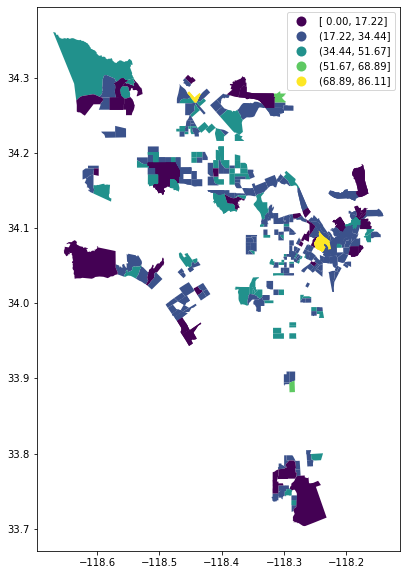

In [20]:
#see, we can only see census tracts with parks with encampments in them.
#I think this will be useful when I devleop a stronger grasp of the data
#but for now let's just focus on encampment reports and census tract info, we can add in parks on the next step.
park_encamp_tracts.plot(figsize=(12,10),
                 column='PCT_50PCTplus',
                 legend=True, 
                 scheme='equal_interval')

In [21]:
#So I'll join ALL encampment reports (not just those in/near parks) with census tract info instead
encamp_tracts = gpd.sjoin(tracts_info, g_encamp_2017)
encamp_tracts.head()

,FIPS,geometry,NAME,QName,STATE,COUNTY,TRACT,TotalPop,PopDens,Area,White,Black,NatAm,Asian,Islander,Other,TwoMore,PCT_White,PCT_Black,PCT_NatAm,PCT_Asian,PCT_Islander,PCT_Other,PCT_TwoMore,MedIncome,RentOccUnits,30to49PCT,50PCTplus,PCT_30to49PCT,PCT_50PCTplus,index_right,req_num,created_date,anon,add_verf,aprox_add,add,house_num,direction,st_name,suffix,zip,lat,long,loc,apc,cd,nc,police_precinct
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",06,037,101110,4314,9780.452,0.441084,3314,47,4,329,4,499,117,76.82,1.09,0.09,7.63,0.09,11.57,2.71,53077.0,829,225,279,27.14,33.66,18031,1-734713721,9/22/2017 0:05,N,Y,N,"7747 W FOOTHILL BLVD, 91042",7747,W,FOOTHILL,BLVD,91042,34.25771723,-118.3011684,"(34.2577172263, -118.301168448)",North Valley APC,7,10,FOOTHILL
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",06,037,101110,4314,9780.452,0.441084,3314,47,4,329,4,499,117,76.82,1.09,0.09,7.63,0.09,11.57,2.71,53077.0,829,225,279,27.14,33.66,23305,1-829491331,11/27/2017 9:47,N,Y,,"7747 W FOOTHILL BLVD, 91042",7747,W,FOOTHILL,BLVD,91042,34.25775598,-118.3011203,"(34.2577559802, -118.301120289)",North Valley APC,7,10,FOOTHILL
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",06,037,101110,4314,9780.452,0.441084,3314,47,4,329,4,499,117,76.82,1.09,0.09,7.63,0.09,11.57,2.71,53077.0,829,225,279,27.14,33.66,25112,1-861922461,12/21/2017 19:30,N,Y,N,"7747 W FOOTHILL BLVD, 91042",7747,W,FOOTHILL,BLVD,91042,34.25775598,-118.3011203,"(34.2577559802, -118.301120289)",North Valley APC,7,10,FOOTHILL
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",06,037,101110,4314,9780.452,0.441084,3314,47,4,329,4,499,117,76.82,1.09,0.09,7.63,0.09,11.57,2.71,53077.0,829,225,279,27.14,33.66,23361,1-830493696,11/27/2017 17:29,Y,Y,,"7747 W FOOTHILL BLVD, 91042",7747,W,FOOTHILL,BLVD,91042,34.25775598,-118.3011203,"(34.2577559802, -118.301120289)",North Valley APC,7,10,FOOTHILL
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",06,037,101110,4314,9780.452,0.441084,3314,47,4,329,4,499,117,76.82,1.09,0.09,7.63,0.09,11.57,2.71,53077.0,829,225,279,27.14,33.66,5123,1-504748550,4/2/2017 15:58,N,Y,,"7771 W FOOTHILL BLVD, 91042",7771,W,FOOTHILL,BLVD,91042,34.25793857,-118.3012817,"(34.2579385721, -118.30128169)",North Valley APC,7,10,FOOTHILL


In [22]:
#we'll need to add frequency to get the number of reports per tract
#and then to dissolve to combine unique incidences (rows)
encamp_tracts['freq'] = encamp_tracts['TRACT'].map(encamp_tracts['TRACT'].value_counts())

encamp_tracts = encamp_tracts.dissolve(by='TRACT')
encamp_tracts.head()

,geometry,FIPS,NAME,QName,STATE,COUNTY,TotalPop,PopDens,Area,White,Black,NatAm,Asian,Islander,Other,TwoMore,PCT_White,PCT_Black,PCT_NatAm,PCT_Asian,PCT_Islander,PCT_Other,PCT_TwoMore,MedIncome,RentOccUnits,30to49PCT,50PCTplus,PCT_30to49PCT,PCT_50PCTplus,index_right,req_num,created_date,anon,add_verf,aprox_add,add,house_num,direction,st_name,suffix,zip,lat,long,loc,apc,cd,nc,police_precinct,freq
TRACT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
101110,"POLYGON ((-118.30229 34.25870, -118.30079 34.2...",06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",06,037,4314,9780.452,0.441084,3314,47,4,329,4,499,117,76.82,1.09,0.09,7.63,0.09,11.57,2.71,53077.0,829,225,279,27.14,33.66,18031,1-734713721,9/22/2017 0:05,N,Y,N,"7747 W FOOTHILL BLVD, 91042",7747,W,FOOTHILL,BLVD,91042,34.25771723,-118.3011684,"(34.2577172263, -118.301168448)",North Valley APC,7,10,FOOTHILL,5
101122,"POLYGON ((-118.30333 34.27354, -118.30318 34.2...",06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",06,037,3239,3172.779,1.020872,2837,61,13,206,0,61,61,87.59,1.88,0.40,6.36,0.00,1.88,1.88,88953.0,230,106,53,46.09,23.04,16360,1-711259131,9/4/2017 16:31,Y,Y,,"10420 N HAINES CANYON AVE, 91042",10420,N,HAINES CANYON,AVE,91042,34.25827375,-118.2780028,"(34.258273747, -118.27800282)",North Valley APC,7,10,FOOTHILL,4
101210,"POLYGON ((-118.29945 34.25598, -118.28592 34.2...",06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",06,037,6052,24089.210,0.251233,4771,172,0,260,0,736,113,78.83,2.84,0.00,4.30,0.00,12.16,1.87,32119.0,1984,482,866,24.29,43.65,8968,1-576038182,5/31/2017 12:04,N,Y,,"9938 N COMMERCE AVE, 91042",9938,N,COMMERCE,AVE,91042,34.24975554,-118.2886127,"(34.2497555377, -118.288612701)",North Valley APC,7,10,FOOTHILL,9
101220,"POLYGON ((-118.28592 34.24896, -118.28592 34.2...",06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",06,037,3497,12959.460,0.269841,2494,71,0,302,0,487,143,71.32,2.03,0.00,8.64,0.00,13.93,4.09,41728.0,823,231,382,28.07,46.42,7008,1-543654692,5/2/2017 13:45,Y,Y,,"9926 N PINEWOOD AVE, 91042",9926,N,PINEWOOD,AVE,91042,34.24863084,-118.2858655,"(34.2486308438, -118.285865465)",North Valley APC,7,10,FOOTHILL,2
101300,"POLYGON ((-118.27247 34.23253, -118.27194 34.2...",06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",06,037,4297,4311.606,0.996612,3705,161,0,289,0,48,94,86.22,3.75,0.00,6.73,0.00,1.12,2.19,86914.0,167,19,72,11.38,43.11,1504,1-438904611,1/30/2017 9:52,Y,Y,,"6500 W FOOTHILL BLVD, 91042",6500,W,FOOTHILL,BLVD,91042,34.24479261,-118.2736397,"(34.2447926074, -118.273639653)",North Valley APC,7,10,FOOTHILL,23


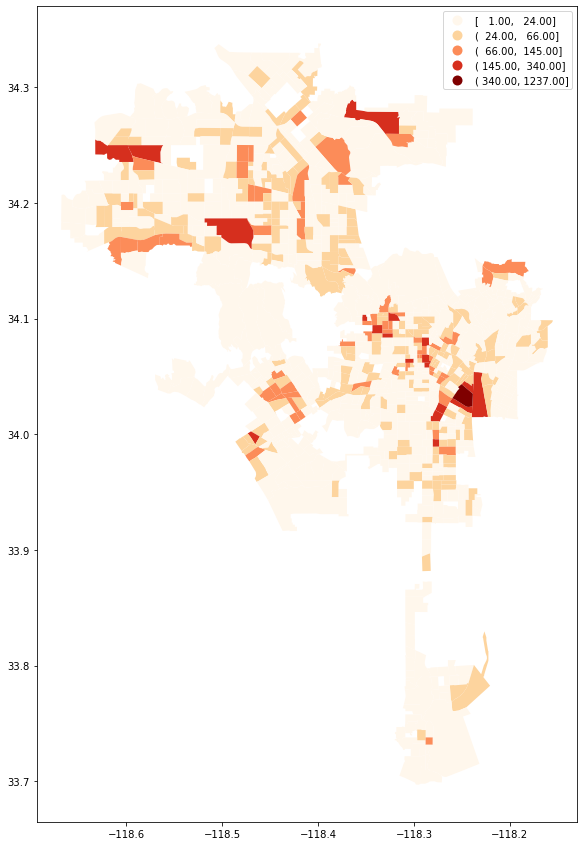

In [23]:
#now we see tracts where encampments were reported in the City of LA
#I find the auto color scheme really hard to read, so I changed to a gradient
#some things stand out: downtown and the sepulveda basin are not surprises
#given skid row and the number of fires in sepulveda basin
#the Lakeview Terrace, Chatsworth Resevoir, and Eagle Rock areas are surprising
encamp_tracts.plot(figsize=(20,15),
                 column='freq',
                 legend=True, 
                 cmap="OrRd",
                 scheme='NaturalBreaks')

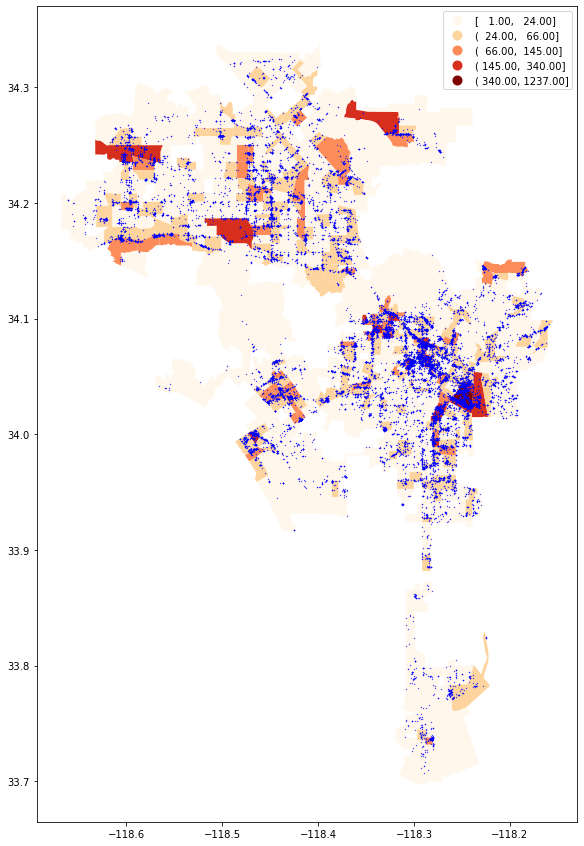

In [24]:
#here's the same map with encampment individual instances on top. 
#I can't figure out how to do opacities
base = encamp_tracts.plot(figsize=(20,15),
                 column='freq',
                 legend=True, 
                 cmap="OrRd",
                 scheme='NaturalBreaks')
g_encamp_2017.plot(ax=base, 
                   marker='o', 
                   color='blue', 
                   markersize=.1, 
                   );

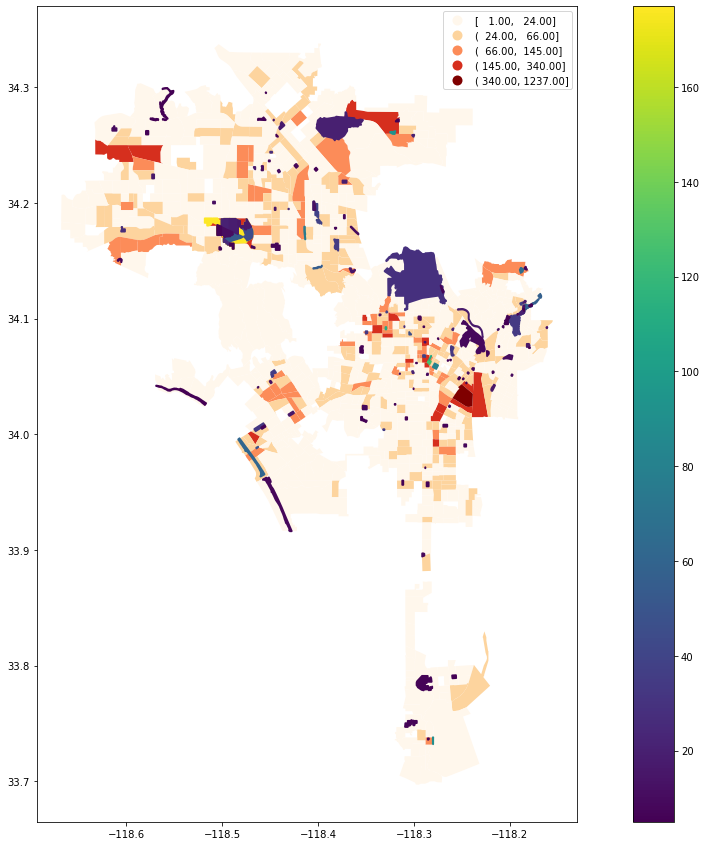

In [25]:
#here's parks sorted by encampment service requests within them + a .5 mi radius
#on top of the base census tracts
#I'd love to have this NOT in Natural Breaks colors and as a transparency layer
base = encamp_tracts.plot(figsize=(20,15),
                 column='freq',
                 legend=True, 
                 cmap="OrRd",
                 scheme='NaturalBreaks')
park_area_w_encamp_2017.plot(ax=base, 
                 column='freq',
                 legend=True, 
                   );

In [26]:
#now we can look for relationships between socioeconomic
#indicators in census tract data and frequency of encampment reports
#one thing I wonder is if many reports come from predomenantly white,
#high income areas
#That doesn't seem to be the case though
encamp_tracts = encamp_tracts.reset_index()
encamp_tracts_sorted = encamp_tracts.sort_values(by='freq',ascending = False)
encamp_tracts_sorted[['FIPS','freq','PCT_White','MedIncome']].head(20)

,FIPS,freq,PCT_White,MedIncome
662,06037226002,1237,46.69,27632.0
411,06037191820,340,41.42,64167.0
661,06037226001,321,35.80,40978.0
504,06037206300,233,30.83,10294.0
659,06037224600,228,32.74,40600.0
86,06037113303,219,63.99,83971.0
500,06037206031,218,49.76,90590.0
704,06037232800,216,43.00,33413.0
381,06037189905,216,82.39,68393.0
542,06037211120,209,12.62,46231.0


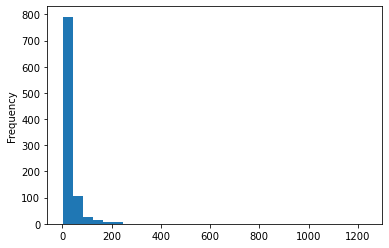

In [27]:
encamp_tracts['freq'].plot.hist(bins=30)

In [28]:
encamp_tracts_sorted[['MedIncome','freq']].head(10)

,MedIncome,freq
662,27632.0,1237
411,64167.0,340
661,40978.0,321
504,10294.0,233
659,40600.0,228
86,83971.0,219
500,90590.0,218
704,33413.0,216
381,68393.0,216
542,46231.0,209


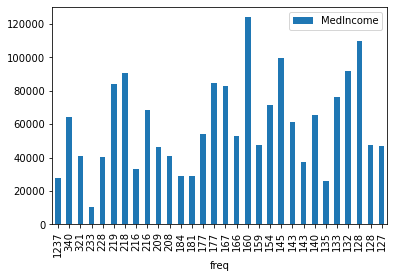

In [35]:
#the data is not currently a dataframe so first we need to convert it
#then can plot some charts
#as I mentioned above, we can see there's not a strong correlation here
df_encamp_tracts_sorted = pd.DataFrame(encamp_tracts_sorted)
df_encamp_tracts_sorted
df_encamp_tracts_sorted = df_encamp_tracts_sorted.reset_index()
df_encamp_tracts_sorted.head(30).plot.bar(x='freq',y='MedIncome')

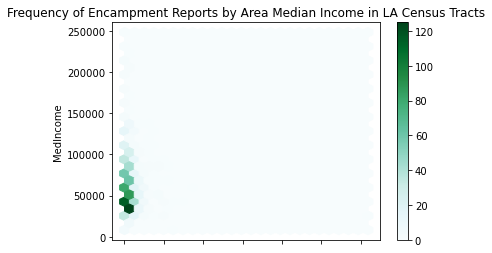

In [47]:
#I'm going to plot the same two variables nevertheless
#to better get my head around the graphing styles
df_encamp_tracts_sorted.plot.hexbin(x='freq', 
                                    y='MedIncome', 
                                    gridsize=25,
                                   title="Frequency of Encampment Reports by Area Median Income in LA Census Tracts")

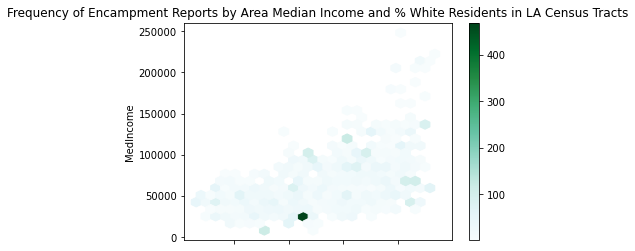

In [49]:
df_encamp_tracts_sorted.plot.hexbin(x='PCT_White', 
                                    y='MedIncome', 
                                    C='freq',
                                    gridsize=25,
                                   title="Frequency of Encampment Reports by Area Median Income and % White Residents in LA Census Tracts")

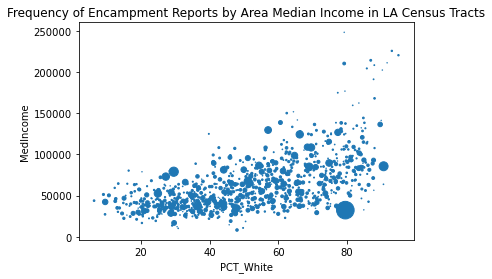

In [51]:
#the scatter plot is a little more revealing
#circle size is frequency, y is Median Income and x is % White residents
#Honestly, this tells us more that wealthier areas are white than it does
#anything about encampments, but still offering clearer relationships
df_encamp_tracts_sorted.plot.scatter(x='PCT_White', 
                                     y='MedIncome', 
                                     s=encamp_tracts['freq'] * .25,
                                    title="Frequency of Encampment Reports by Area Median Income in LA Census Tracts");

# Group
**Rayne Laborde**